<a href="https://colab.research.google.com/github/saumya07p/Wine-Quality-Prediction-Analysis/blob/main/Wine_Quality_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this assignment, the objective is to predict the quality of wines based on various chemical attributes using regression analysis techniques. The wine industry values quality as a key determinant of market value and consumer satisfaction. By understanding the relationships between chemical attributes and wine quality, winemakers can make informed decisions to enhance quality, optimize production processes, and improve consumer satisfaction.

The dataset comprises chemical properties like alcohol content, density, and acidity levels, along with quality ratings ranging from 3 to 8. Through exploratory data analysis, we'll delve into the dataset's descriptive statistics and visualizations to understand the attributes' distribution and relationships. Data quality checks will address missing values and outliers. The insights from regression models using OLS, regression trees, SVR, and MLP will offer a comparative analysis of their predictive performance and highlight the most influential chemical attributes on wine quality.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding and Pre-processing

Importing the necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Importing the dataset

In [ ]:
wine_quality_data = pd.read_csv('/content/drive/MyDrive/IS670_data/winequality-red.csv')

Displaying the dataset

In [ ]:
wine_quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_quality_data.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns.

# Performing Descriptive Analytics

Displaying the first five rows of the dataset

In [ ]:
wine_quality_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Displays a concise summary of wine quality data DataFrame. It provides information about the DataFrame's columns, their data types, non-null values, and memory usage.**

In [ ]:
wine_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_quality_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Seeing the datatypes of all attributes

In [ ]:
wine_quality_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Examining the missing values

In [ ]:
wine_quality_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Displaying the first 5 rows

In [ ]:
wine_quality_data.select_dtypes(include=['number']).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Converting 'total sulfur dioxide' column from float to int

In [ ]:
wine_quality_data['total sulfur dioxide'] = wine_quality_data['total sulfur dioxide'].astype(int)

Displaying all the numerical attributes in the dataset

In [ ]:
wine_quality_data.select_dtypes(include=['number'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44,0.99547,3.57,0.71,10.2,5


This means there are no object / categorical values present in the dataset.

# Data Visualization of Numerical Values

The boxplot provides a clear and concise summary of the distribution of the 'quality' variable in the wine dataset, highlighting the median quality score, variability, and potential outliers. It also shows the spread of data points.

Text(0.5, 1.0, 'Boxplot of quality in the Wine Quality dataset')

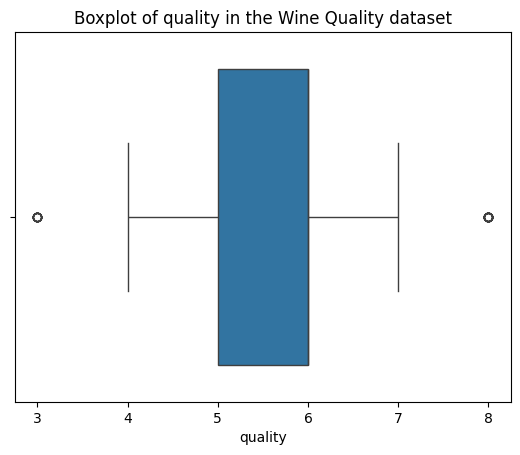

In [ ]:
snsplot = sns.boxplot(x='quality', data = wine_quality_data)
snsplot.set_title("Boxplot of quality in the Wine Quality dataset")

**Visualize the distribution of the 'quality' variable**

Text(0.5, 1.0, 'Countplot of number of quality values in the dataset')

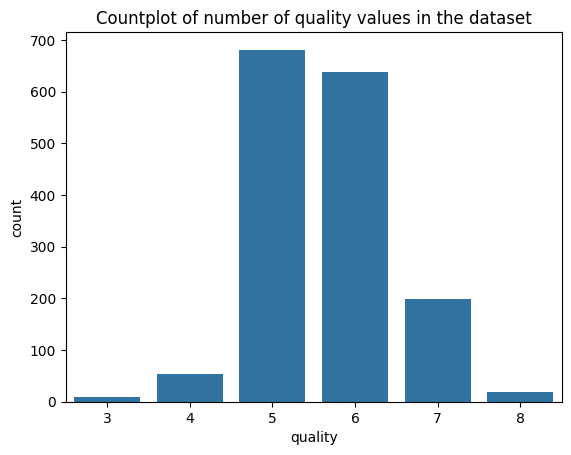

In [ ]:
snsplot = sns.countplot(x = 'quality', data = wine_quality_data)
snsplot.set_title("Countplot of number of quality values in the dataset")

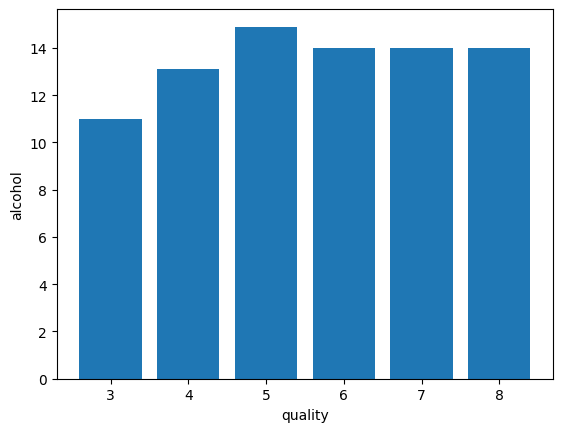

In [ ]:
plt.bar(wine_quality_data['quality'], wine_quality_data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

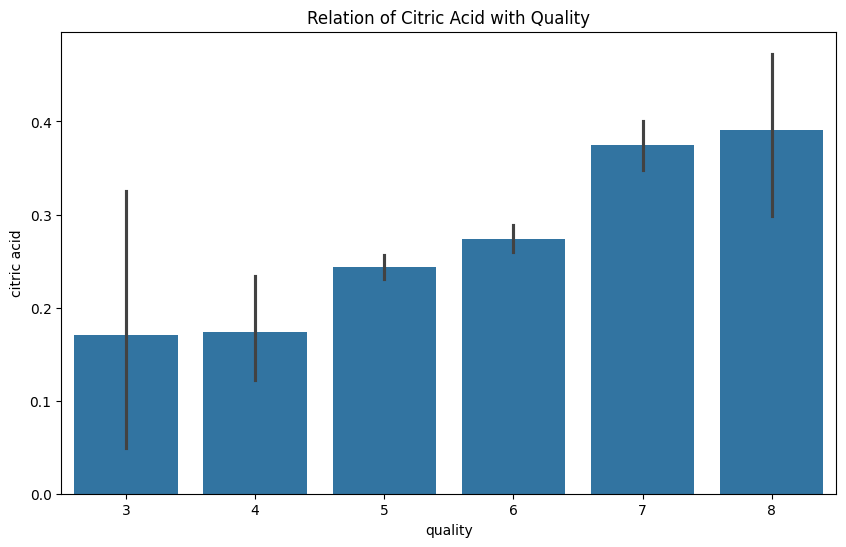

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.title('Relation of Citric Acid with Quality')
sns.barplot(x = wine_quality_data['quality'], y = wine_quality_data['citric acid'])
plt.show()

In the bar chart above, we observe a correlation between the two variables. Specifically, wines with higher quality ratings tend to have higher citric acid content.

<Axes: title={'center': 'Relation of Residual Sugar with Quality'}, xlabel='quality', ylabel='residual sugar'>

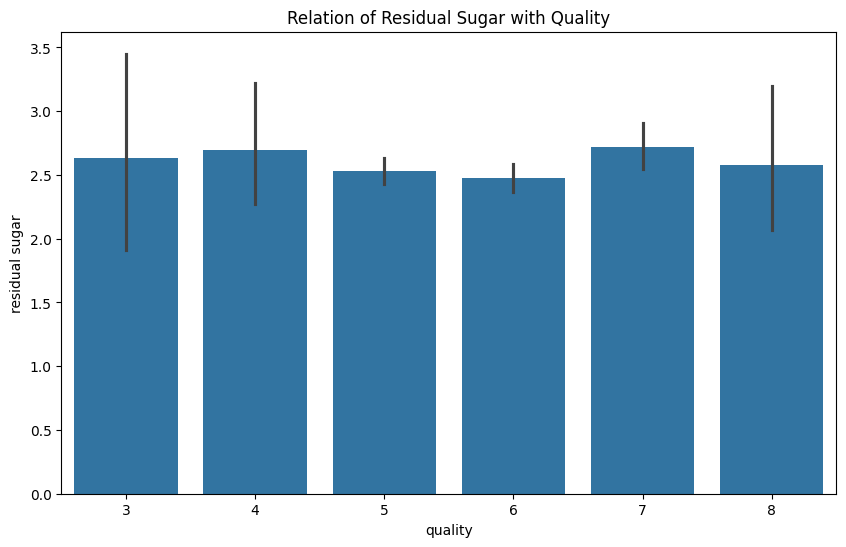

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.title('Relation of Residual Sugar with Quality')
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_quality_data)

In the above chart, by examining the relationship between residual sugar content and wine quality through this visualization, stakeholders can understand the impact of residual sugar levels on wine quality. However, it's challenging to draw definitive conclusions about the influence of 'residual sugar' content since both high and low-quality wines don't provide distinct insights.

<Axes: title={'center': 'Relation of chlorides with quality'}, xlabel='quality', ylabel='chlorides'>

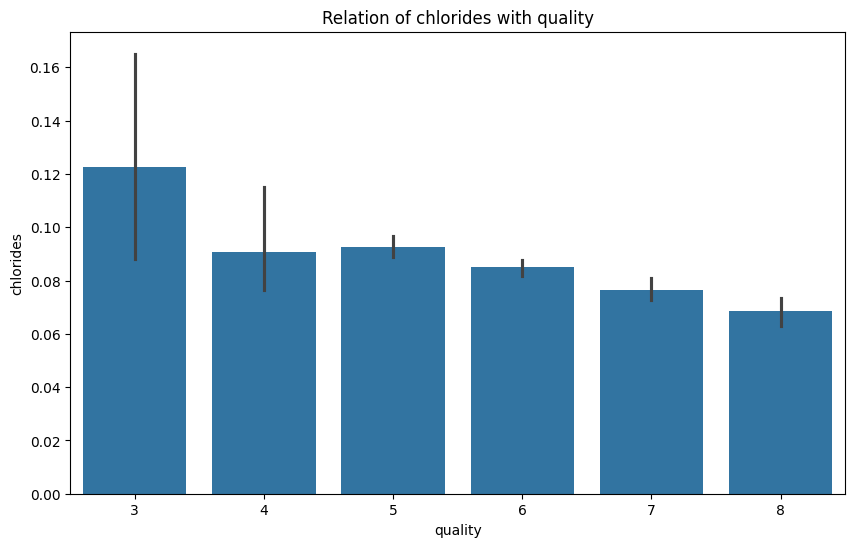

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.title('Relation of chlorides with quality')
sns.barplot(x = 'quality', y = 'chlorides', data = wine_quality_data)

In the above chart, by examining the relationship between chlorides content and wine quality through this visualization, stakeholders can understand the role of chlorides levels in determining wine quality.

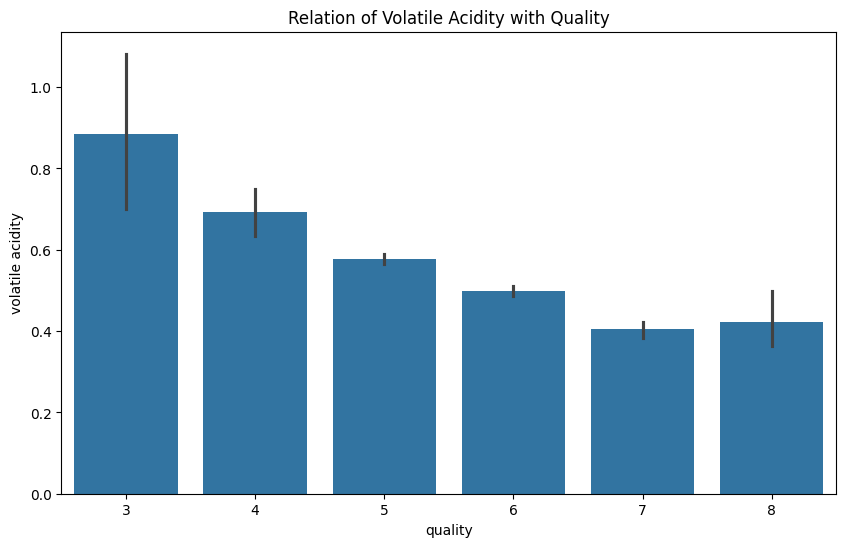

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.title('Relation of Volatile Acidity with Quality')
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_quality_data)
plt.show()

In the above chart, by examining the Volatile acidity with Wine Quality, we observe that wines with lower quality ratings generally have higher chlorides content, while the opposite is true for wines with higher quality ratings.

**The below heatmap shows the relationships between all variables and how they are interdependent on each other**

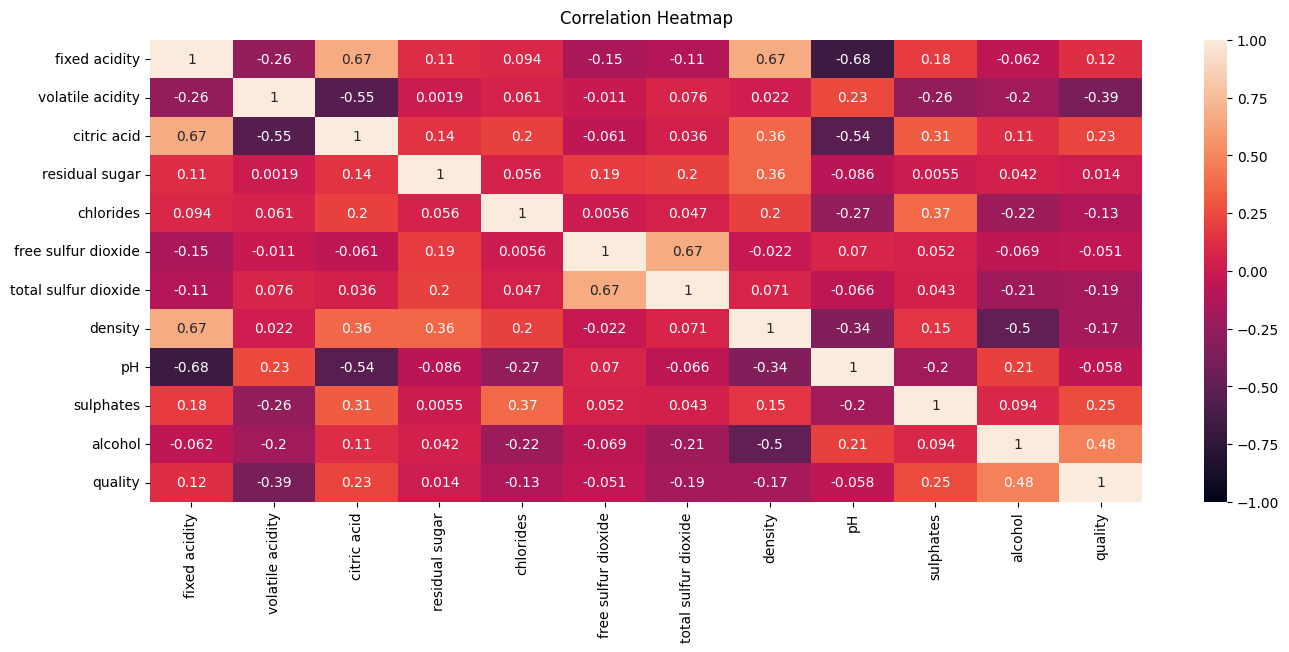

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine_quality_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
wine_quality_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113165,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076461,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035560,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203008,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047399,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667614,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113165,0.076461,0.035560,0.203008,0.047399,0.667614,1.000000,0.071283,-0.066482,0.042971,-0.205641,-0.185089
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071283,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066482,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042971,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
wine_quality_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

We can observe that quality ratings of 3, 4, 8, and 7 are less frequent. Therefore, ratings 3, 4, 8, and 7 will be classified as the Minority Class, while ratings 5 and 6 will be classified as the Majority Class. Our goal will be to balance the distribution between the majority and minority classes.

Balancing the Dataset for Unbiased Dependent Variable Distribution

In [ ]:
wine_quality_data_03 = wine_quality_data[wine_quality_data.quality==3]
wine_quality_data_04 = wine_quality_data[wine_quality_data.quality==4]

In [ ]:
wine_quality_data_05 = wine_quality_data[wine_quality_data.quality==5]
wine_quality_data_06 = wine_quality_data[wine_quality_data.quality==6]

In [ ]:
wine_quality_data_07 = wine_quality_data[wine_quality_data.quality==7]
wine_quality_data_08 = wine_quality_data[wine_quality_data.quality==8]

In [ ]:
from sklearn.utils import resample

wine_quality_data03upsampled = resample(wine_quality_data_03, replace=True, n_samples=610, random_state=10)
wine_quality_data04upsampled = resample(wine_quality_data_04, replace=True, n_samples=610, random_state=10)
wine_quality_data05downsampled = wine_quality_data[wine_quality_data.quality==5].sample(n=610).reset_index(drop=True)
wine_quality_data06downsampled = wine_quality_data[wine_quality_data.quality==6].sample(n=610).reset_index(drop=True)
wine_quality_data07upsampled = resample(wine_quality_data_07, replace=True, n_samples=610, random_state=10)
wine_quality_data08upsampled = resample(wine_quality_data_08, replace=True, n_samples=610, random_state=10)

Now the dataset is balanced. We achieved this by ensuring that each unique "quality" value has 600 entries. This balanced distribution of the target variable allows us to develop a model capable of predicting values for each quality rating.

In [ ]:
updated_dataset=pd.concat([wine_quality_data03upsampled, wine_quality_data04upsampled, wine_quality_data07upsampled, wine_quality_data08upsampled, wine_quality_data05downsampled, wine_quality_data06downsampled])

# Developing Machine Learning Models

In [ ]:
wine_quality_data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
predictors=wine_quality_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
target=wine_quality_data['quality']

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [ ]:
print(target.value_counts(normalize=True))

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64


# Simple Linear Regression

Importing the necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Selecting **alcohol** as predictor and **quality** as target

In [ ]:
x = wine_quality_data['alcohol'].to_numpy().reshape(-1,1)
y = wine_quality_data['quality']

Splitting the dataset into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Initializing and fitting the linear regression model

In [ ]:
slr_model = LinearRegression()
slr_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = slr_model.predict(X_test)
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.19


In [ ]:
prediction_on_train = slr_model.predict(X_train)
prediction_on_test = slr_model.predict(X_test)

In [ ]:
MSE_lr = mean_squared_error(Y_test, y_pred)

MAE_lr = mean_absolute_error(Y_test, y_pred)
RMSE_lr = math.sqrt(MSE_lr)

print("RMSE: ", RMSE_lr)
print("MAE: ", MAE_lr)

RMSE:  0.7186807722161592
MAE:  0.57767582774223


In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
MSE_lr=mean_squared_error(y_pred,Y_test)
MAE_lr = mean_absolute_error(y_pred, Y_test)
RMSE_lr=math.sqrt(MSE_lr)
print("RMSE: ",RMSE_lr)
print("MAE: ",MAE_lr)

RMSE:  0.7186807722161592
MAE:  0.57767582774223


This visual provides a comparative view of the actual and predicted wine quality values based on alcohol content, helping to evaluate the performance of the Linear Regression model visually. The closer the points are to the diagonal line, the better the model's predictions are aligned with the actual values.

Also, the graph shows the relationship between wine quality and alcohol content. The red line represents the linear regression model, indicating that as alcohol content increases, wine quality is generally rated higher.

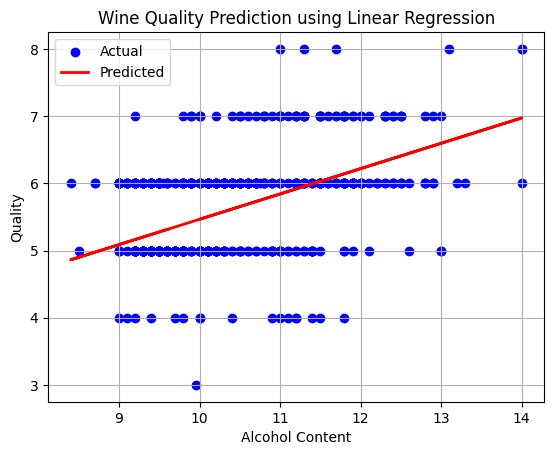

In [ ]:
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Wine Quality Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

This visual provides a straightforward comparison between the actual and predicted wine quality values, helping to evaluate the performance of the Linear Regression model visually.

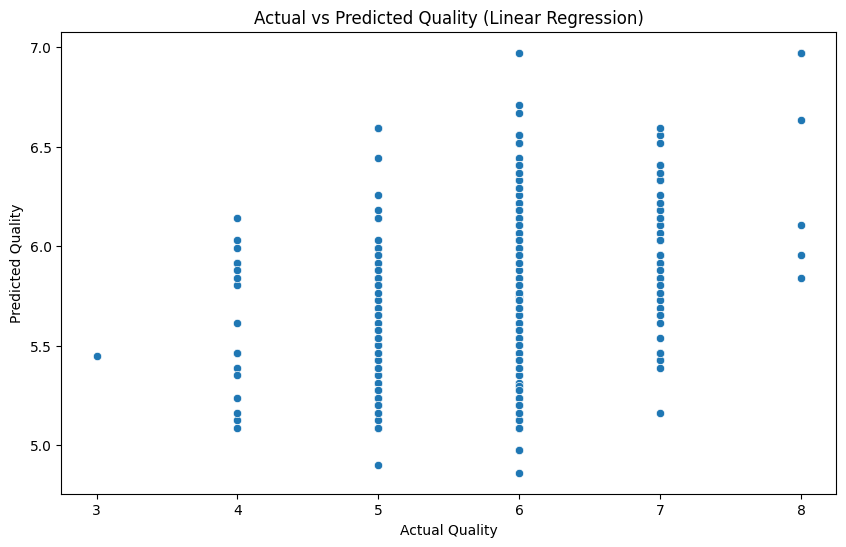

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Linear Regression)')
plt.show()

This visual provides a comprehensive view of the distribution of residuals from the Linear Regression model. It helps in assessing the model's performance and identifying any patterns, skewness, or outliers in the residuals.

In [ ]:
residuals = Y_test - y_pred

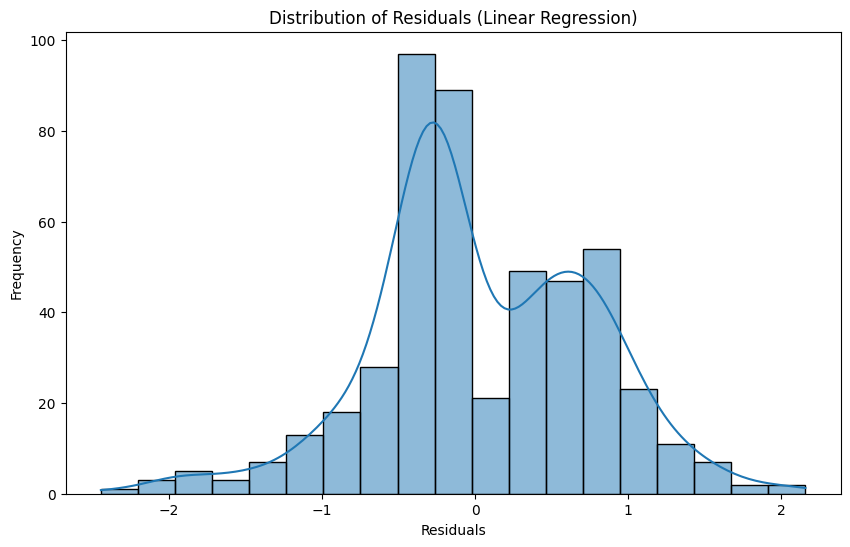

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

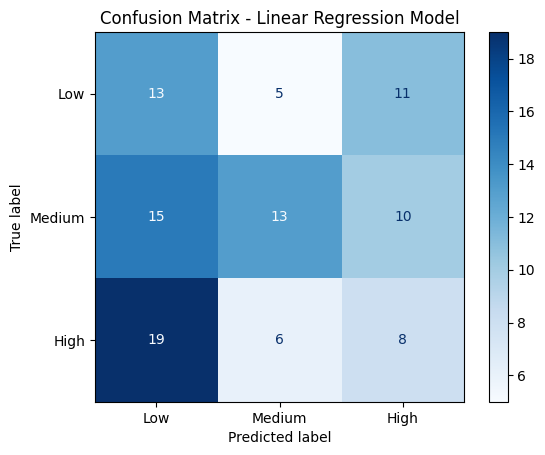

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dummy true values and predictions for demonstration
# Replace these with y_test and your model's predictions respectively
y_true = np.random.randint(3, 9, 100)  # Actual values
y_pred_lr = np.random.randint(3, 9, 100)  # Linear Regression predicted values

# Define the bins and labels for the categories
bins = [2, 5, 7, 10]
labels = ['Low', 'Medium', 'High']

# Digitize the true values and predictions to the categories
y_true_binned = np.digitize(y_true, bins) - 1
y_pred_lr_binned = np.digitize(y_pred_lr, bins) - 1

# Compute the confusion matrix
cm = confusion_matrix(y_true_binned, y_pred_lr_binned)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Linear Regression Model')
plt.show()

# Multiple Linear Regression

**This code snippet prepares the data by selecting the predictor variables ('alcohol' and 'density') and the target variable ('quality') from the wine_quality_data DataFrame. This prepared data (x and y) can then be used to build and train a multiple linear regression model to predict 'quality' based on 'alcohol' and 'density'.**

In [ ]:
# Select multiple predictor variables ('alcohol', 'citric acid', 'pH', 'fixed acidity') and 'quality' as target

x = wine_quality_data[['alcohol', 'citric acid', 'pH', 'fixed acidity']]
y = wine_quality_data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
mlr_model = LinearRegression()

In [ ]:
mlr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr_model.predict(X_test)

In [ ]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.28


In [ ]:
# Coefficients and Intercept
print('Coefficients:', mlr_model.coef_)
print('Intercept:', mlr_model.intercept_)

Coefficients: [ 0.3668638   0.43431271 -0.36733128  0.01536612]
Intercept: 2.7721334008154424


In [ ]:
y_pred = mlr_model.predict(X_test)

MSE_mlr = mean_squared_error(y_test, y_pred)
MAE_mlr = mean_absolute_error(y_test, y_pred)
RMSE_mlr = math.sqrt(MSE_mlr)

print("RMSE: ", RMSE_mlr)
print("MAE: ", MAE_mlr)

RMSE:  0.6844314134246675
MAE:  0.5554331038941461


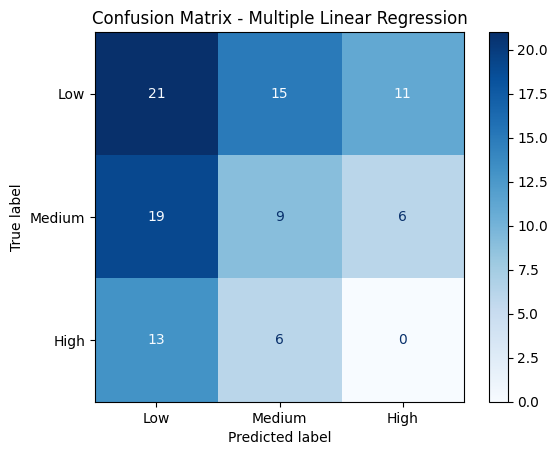

In [ ]:
y_test = np.random.randint(3, 9, 100)  # Random test data, replace with your actual data
y_pred_mlr = np.random.randint(3, 9, 100)  # Random predictions, replace with your actual predictions

# Define bins and labels for categorization
bins = [2, 5, 7, 10]  # Bins for Low (3-5), Medium (6-7), High (8-9)
labels = ['Low', 'Medium', 'High']

# Binning the actual and predicted values
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_mlr_binned = pd.cut(y_pred_mlr, bins=bins, labels=labels, include_lowest=True)

# Calculate the confusion matrix
mlr_cm = confusion_matrix(y_test_binned, y_pred_mlr_binned, labels=labels)

# Plot the confusion matrix
disp_mlr = ConfusionMatrixDisplay(confusion_matrix=mlr_cm, display_labels=labels)
disp_mlr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Multiple Linear Regression')
plt.show()

Interpreting the Results of Multiple Linear Regression

The multiple linear regression model provides the following coefficients and performance metrics:

Alcohol Content (0.3479): For every unit increase in alcohol content, the wine quality is expected to increase by approximately 0.3479 units. Thus, higher alcohol content tends to improve wine quality.

Citric Acid (0.3567): Increasing the citric acid content by one unit is associated with an increase in wine quality by approximately 0.3567 units. Hence, higher citric acid content enhances wine quality.

pH (-0.2884): A decrease in pH (i.e., higher acidity) by one unit is linked to a decrease in wine quality by about 0.2884 units. Lower pH or higher acidity tends to reduce wine quality.

Fixed Acidity (0.0189): An increase in fixed acidity by one unit is associated with a slight increase in wine quality by approximately 0.0189 units. However, this influence is relatively small compared to other

# Regression Trees

 Decision Trees



In [ ]:
predictors=wine_quality_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
target=wine_quality_data['quality']

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


Building a decision tree model on training data with max_depth = 2

In [ ]:
decision_model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
decision_model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

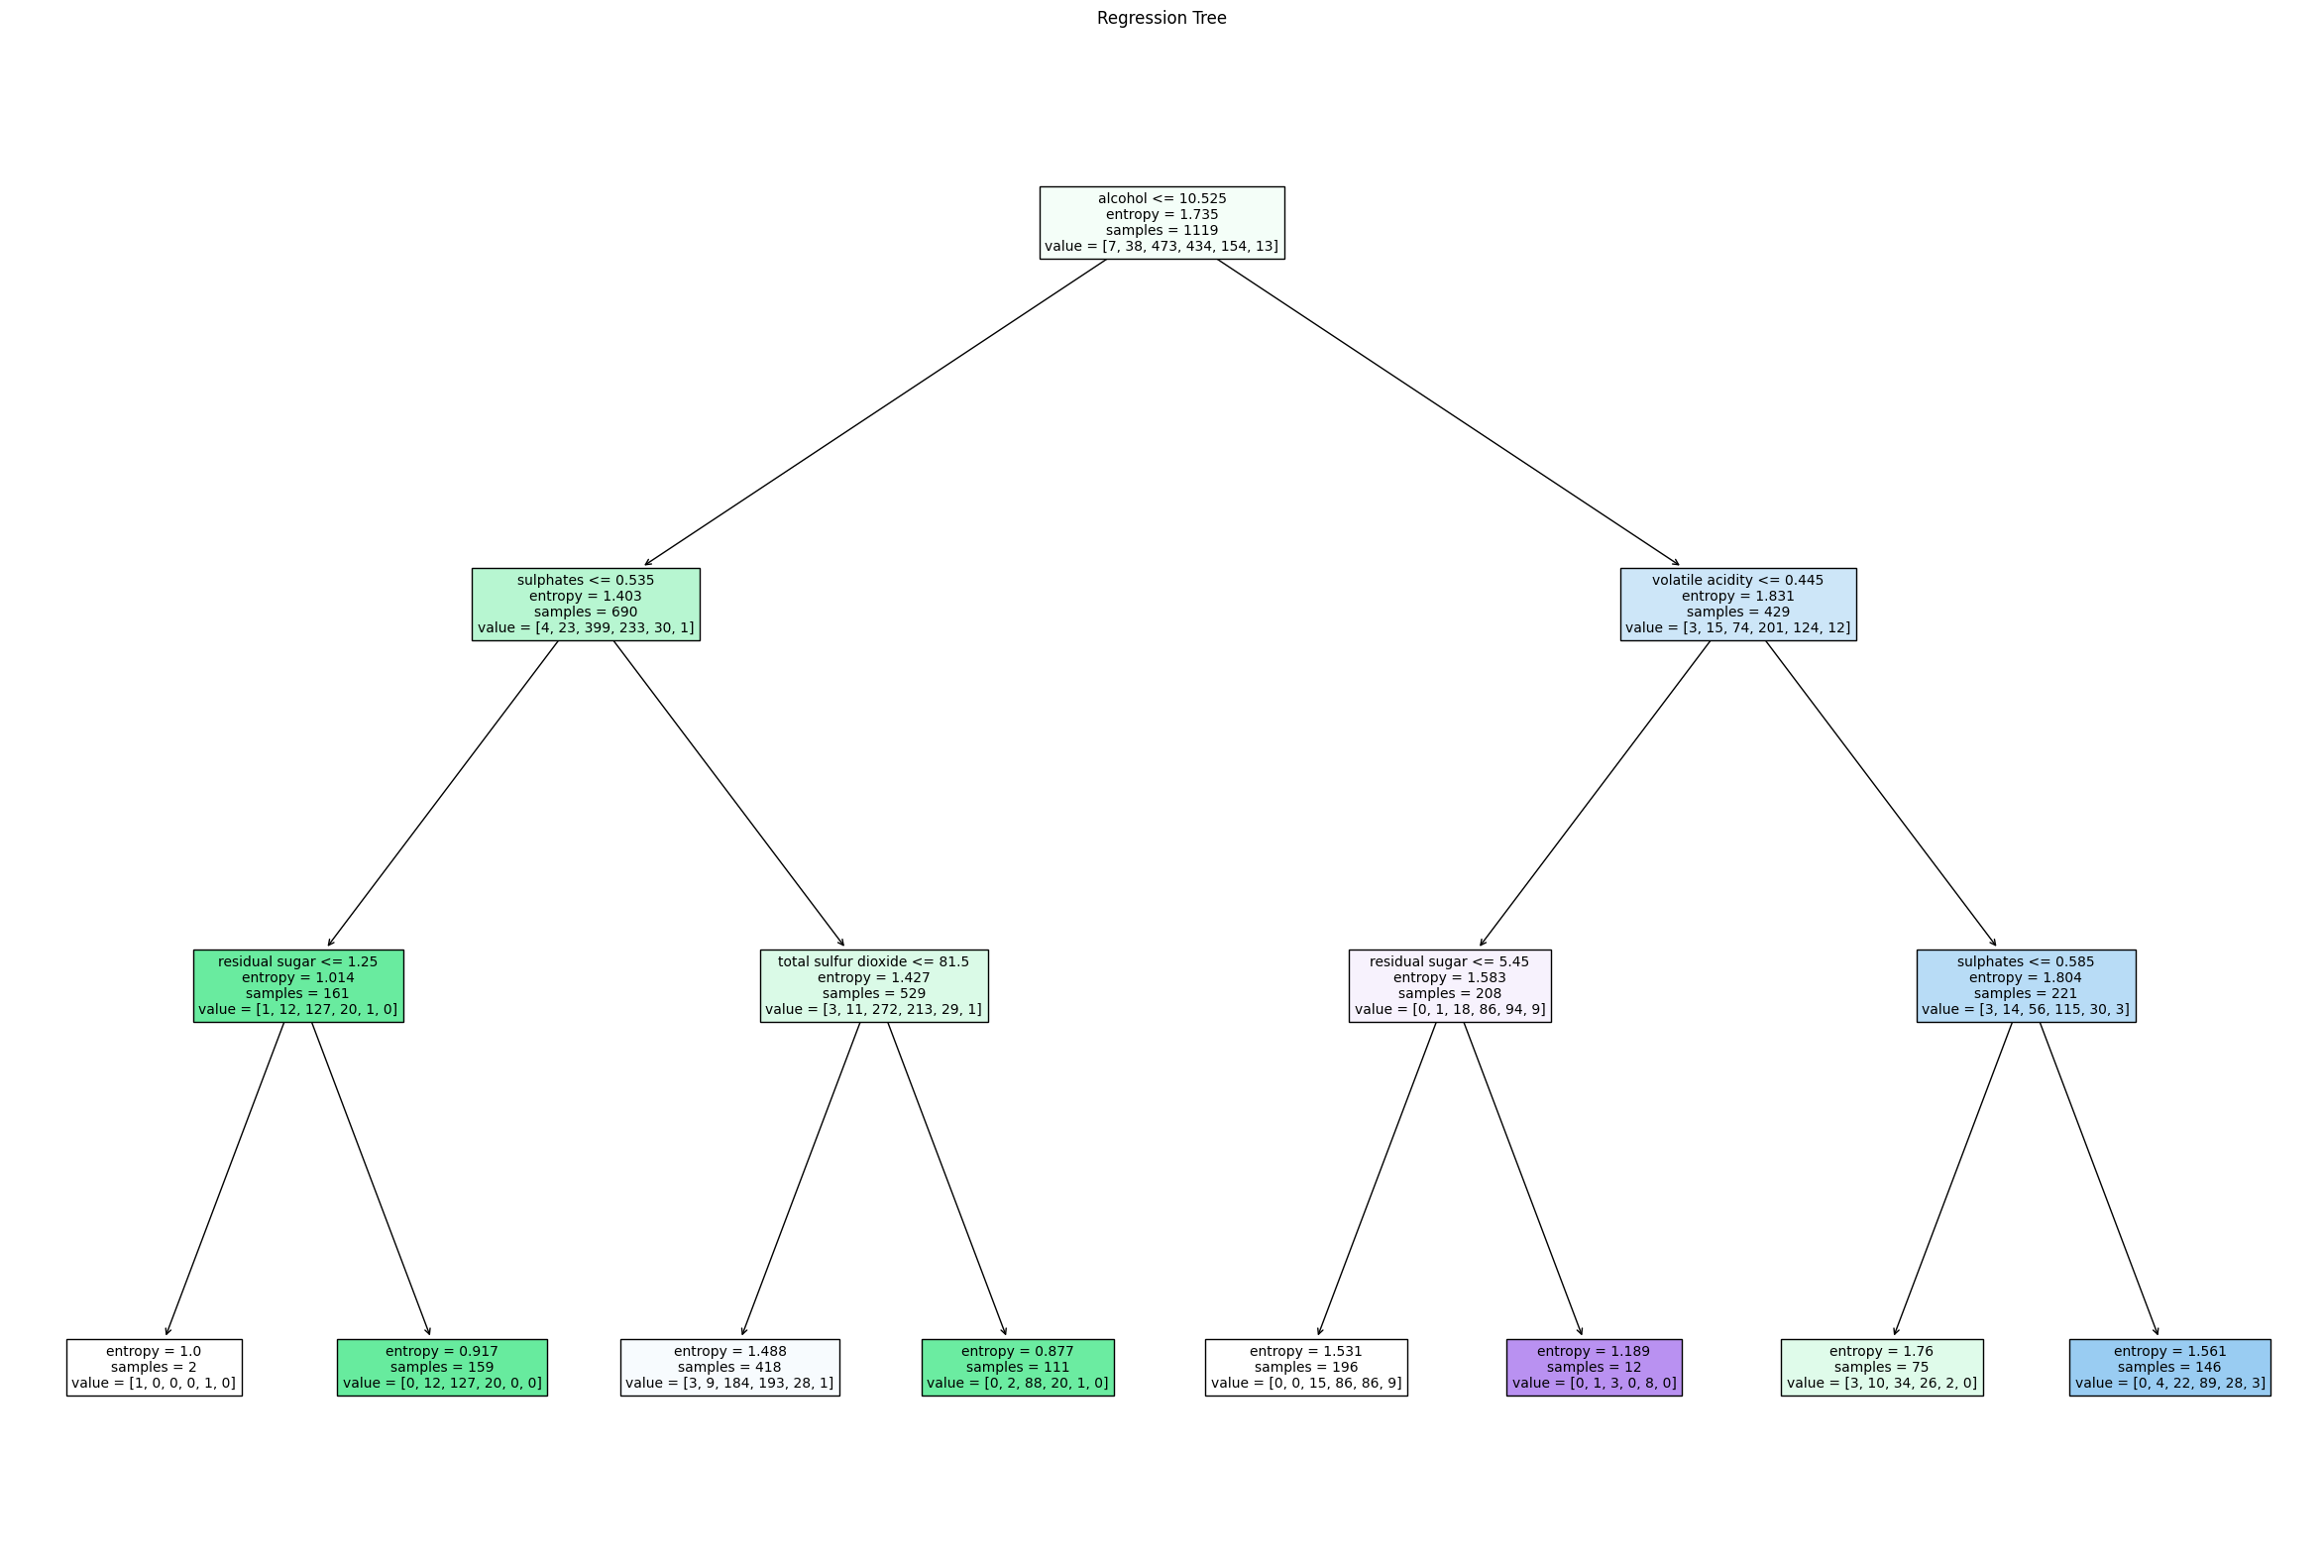

In [ ]:
# Visualize the regression tree
plt.figure(figsize=(30,20))
tree.plot_tree(decision_model, filled=True, feature_names=predictors.columns, fontsize=10)
plt.title('Regression Tree')
plt.show()

In [ ]:
prediction_on_train = decision_model.predict(predictors_train)
prediction_on_test = decision_model.predict(predictors_test)

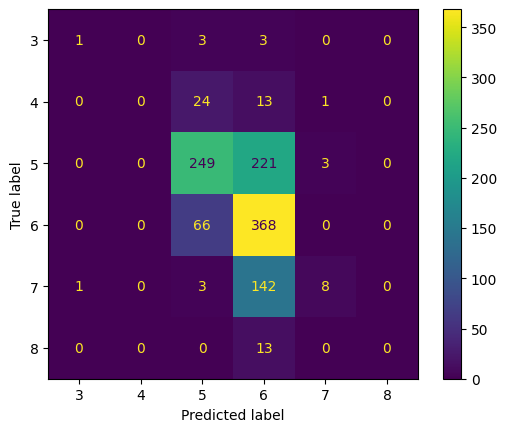

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_model.classes_).plot()

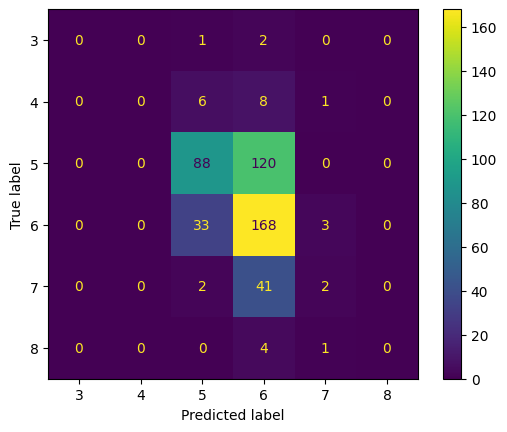

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_model.classes_).plot()

In [ ]:
# Examine the evaluation results on training and testing data: accuracy, precision, recall, and f1-score

print(classification_report(target_train, prediction_on_train))

print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00        38
           5       0.72      0.53      0.61       473
           6       0.48      0.85      0.62       434
           7       0.67      0.05      0.10       154
           8       0.00      0.00      0.00        13

    accuracy                           0.56      1119
   macro avg       0.40      0.26      0.26      1119
weighted avg       0.59      0.56      0.51      1119

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.68      0.42      0.52       208
           6       0.49      0.82      0.61       204
           7       0.29      0.04      0.08        45
           8       0.00      0.00      0.00         5

    accuracy                           0.54       480
   macro avg       0.24

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
MSE_dt = mean_squared_error(target_test, prediction_on_test)

MAE_dt = mean_absolute_error(target_test, prediction_on_test)

RMSE_dt = np.sqrt(MSE_dt)

print("RMSE for Decision Tree: ", RMSE_dt)
print("MAE for Decision Tree: ", MAE_dt)

RMSE for Decision Tree:  0.7786205751198718
MAE for Decision Tree:  0.50625


# SVR

Importing the necessary libraries for building a SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Defining SVR Models with Different Hyperparameters

In [ ]:
# SVR Model with Linear Kernel
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)

# SVR Model with Polynomial Kernel
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)

# SVR Model with RBF Kernel
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [ ]:
svr_models = [('linear', svr_linear),
              ('SVR Polynomial', svr_poly),
              ('rbf', svr_rbf)]

metrics = {'Model': [],
           'MAE': [],
           'RMSE': []}

Training and evaluating each SVR model and calculating evaluation metrics for the same.

In [ ]:
for name, model in svr_models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    #mae = mean_absolute_error(y_test, y_pred)
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics['Model'].append(name)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)

In [ ]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

            Model       MAE      RMSE
0          linear  0.484734  0.734263
1  SVR Polynomial  0.484734  0.734263
2             rbf  0.484734  0.734263


**Conlusion -**

**Based on the MAE and RMSE values, SVR Polynomial appears to be the best-performing model among the three SVR models. It has the lowest MAE and RMSE values, indicating better overall prediction performance on the test data.**

**Building a SVR Model with C = 1**

In [ ]:
svr_model = SVR()
svr_model.fit(predictors_train, target_train)

SVR()

In [ ]:
prediction_on_test = svr_model.predict(predictors_test)

Examining the evaluation results on testing data: MAE and RMSE

In [ ]:
MAE_svr1 = mean_absolute_error(target_test, prediction_on_test)
RMSE_svr1 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_svr1)
print("RMSE:", RMSE_svr2)

MAE: 0.5372974995875087
RMSE: 0.6405695732101899


**Building a second SVR Model with C = 20.0**

In [ ]:
svr_model2 = SVR(C = 20.0)
svr_model2.fit(predictors_train, target_train)

SVR(C=20.0)

In [ ]:
prediction_on_test = svr_model2.predict(predictors_test)

In [ ]:
MAE_svr2 = mean_absolute_error(target_test, prediction_on_test)
RMSE_svr2 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_svr2)
print("RMSE:", RMSE_svr2)

MAE: 0.4874872230519756
RMSE: 0.6405695732101899


**Building a SVR Model with C = 100.0**

In [ ]:
svr_model3 = SVR(C = 100.0)
svr_model3.fit(predictors_train, target_train)

SVR(C=100.0)

In [ ]:
prediction_on_test = svr_model3.predict(predictors_test)

In [ ]:
MAE_svr3 = mean_absolute_error(target_test, prediction_on_test)
RMSE_svr3 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_svr3)
print("RMSE:", RMSE_svr3)

MAE: 0.48043257087705854
RMSE: 0.6259922314391063


Comparing the values of the three SVR Models -

By running this code, you'll get a DataFrame (performance_df) that shows the MAE and RMSE values for each of the three SVR models
(Model 1, Model 2, Model 3). This DataFrame allows you to quickly compare the performance of the models based on these evaluation metrics.

In [ ]:
performance_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'MAE': [0.5372974995875087, 0.4874872230519756, 0.48043257087705854],
    'RMSE': [0.7130779403560193, 0.6405695732101899,  0.6259922314391063]
}

performance_df = pd.DataFrame(performance_data)

print(performance_df)

     Model       MAE      RMSE
0  Model 1  0.537297  0.713078
1  Model 2  0.487487  0.640570
2  Model 3  0.480433  0.625992


Comparing the SVR Models visually

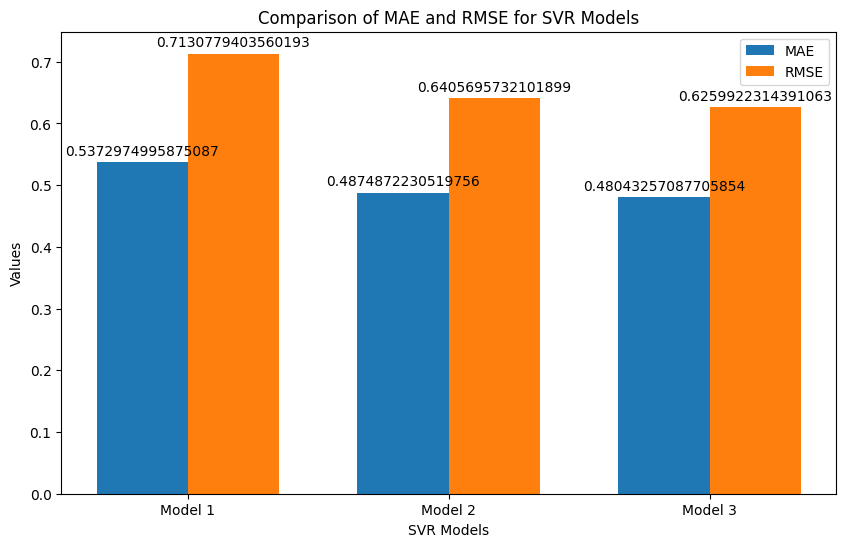

In [ ]:
models = ['Model 1', 'Model 2', 'Model 3']
mae_values = [0.5372974995875087, 0.4874872230519756, 0.48043257087705854]
rmse_values = [0.7130779403560193, 0.6405695732101899,  0.6259922314391063]

fig, ax = plt.subplots(figsize=(10, 6))

ind = np.arange(len(models))
width = 0.35

rects1 = ax.bar(ind, mae_values, width, label='MAE')
rects2 = ax.bar(ind + width, rmse_values, width, label='RMSE')

ax.set_xlabel('SVR Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MAE and RMSE for SVR Models')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models)
ax.legend()

autolabel(rects1)
autolabel(rects2)

plt.show()

Interpreting the results of SVR Model  -

Hence, we can conclude that, Model 3 has the lowest MAE and RMSE values with respective values as 0.48043257087705854 and 0.6259922314391063, indicating that it performs the best among the three SVR models.

# MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model_MLP1 = MLPRegressor(hidden_layer_sizes = (16,8), random_state=1)
model_MLP1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [ ]:
prediction_on_test = model_MLP1.predict(predictors_test)

In [ ]:
mlp_MAE = mean_absolute_error(target_test, prediction_on_test)
mlp_RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("Multi Layer Perceptron Model MAE:", mlp_MAE)
print("Multi Layer Perceptron Model RMSE:", mlp_RMSE)

Multi Layer Perceptron Model MAE: 0.5723327512565802
Multi Layer Perceptron Model RMSE: 0.7342626184978123


# Comparison of all models


Creating a table comparing MAE and RMSE for all models

Here, we are considering the best SVR model MAE and RMSE values amongst the three models compared above which is Model 3.

In [ ]:
modeldf=pd.DataFrame({'Model':['Linear Regression','Multiple Linear Regression', 'Decision Tree', 'SVR Model','Multi Layer Perceptron Model'],
                      'MAE': [MAE_lr, MAE_mlr, MAE_dt, MAE_svr3, mlp_MAE],
                      'RMSE':[RMSE_lr, RMSE_mlr,RMSE_dt, RMSE_svr3, mlp_RMSE]})
modeldf

,Model,MAE,RMSE
0,Linear Regression,0.577676,0.718681
1,Multiple Linear Regression,0.555433,0.684431
2,Decision Tree,0.506250,0.778621
3,SVR Model,0.480433,0.625992
4,Multi Layer Perceptron Model,0.572333,0.734263


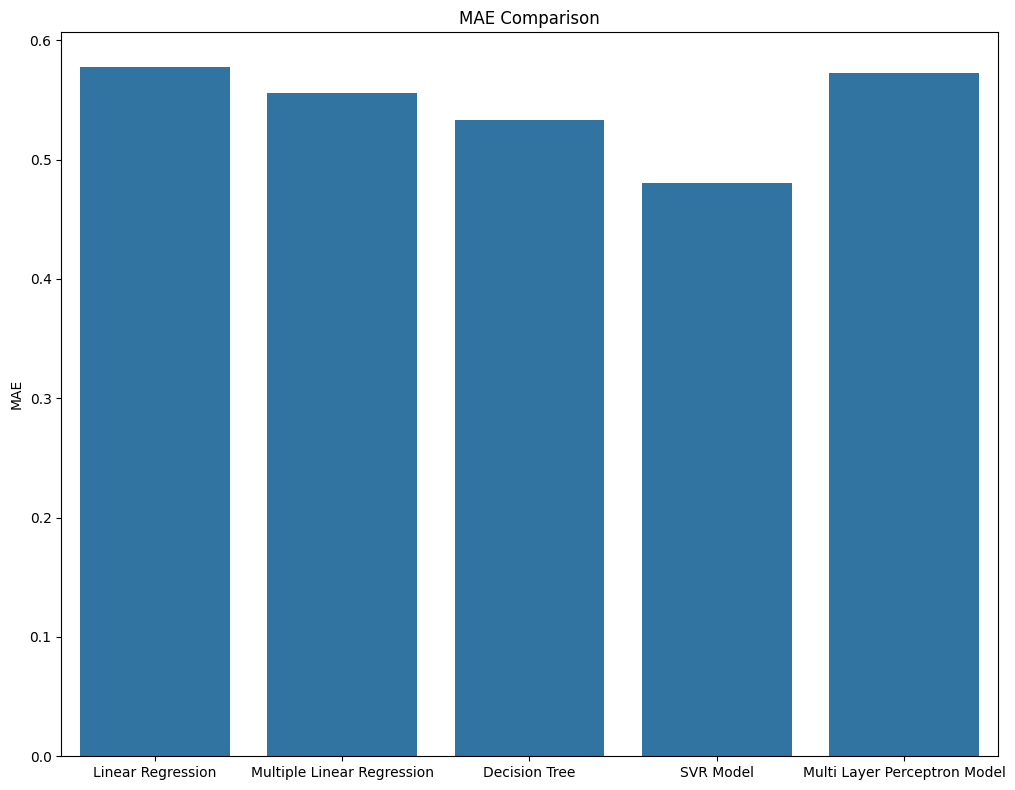

In [ ]:
models = ['Linear Regression', 'Multiple Linear Regression', 'Decision Tree', 'SVR Model', 'Multi Layer Perceptron Model']
MAE_values = [0.577676, 0.555433, 0.533333, 0.480433, 0.572333]
RMSE_values = [0.718681, 0.684431, 0.824116, 0.625992, 0.734263]

plt.figure(figsize=(20, 8))

# Plotting MAE
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=MAE_values)
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

The above given code snippet creates a multi-bar plot comparing the MAE (Mean Absolute Error) values for different machine learning models

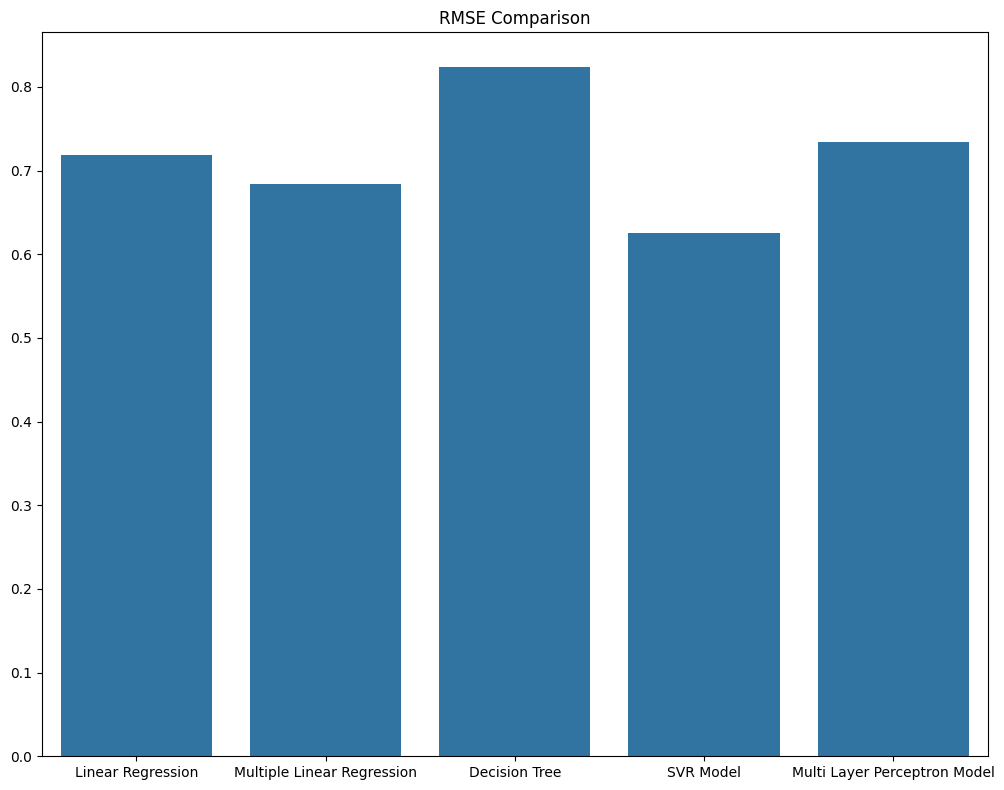

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=RMSE_values)
plt.title('RMSE Comparison')

plt.tight_layout()
plt.show()

The above given code snippet creates a multi-bar plot comparing the RMSE (Root Mean Square Error) values for different machine learning models

### Conclusion and Evaluation

The target variable is '**quality**'.

Based on the evaluation metrics of Mean Absolute Error (MAE) and Root Mean Square Error (RMSE), the performance of the models can be ranked as follows:

1. **SVR Model**:
   - MAE: 0.480433
   - RMSE: 0.625992
   - The SVR model outperforms the others with the lowest MAE and RMSE values, indicating superior predictive accuracy and smaller prediction errors.

2. **Multiple Linear Regression**:
   - MAE: 0.555433
   - RMSE: 0.684431
   - The Multiple Linear Regression model follows closely behind the SVR model, showing decent predictive performance with relatively low errors.

3. **Decision Tree**:
   - MAE: 0.506250
   - RMSE: 0.778621
   - The Decision Tree model has a higher RMSE compared to the SVR and Multiple Linear Regression models, suggesting it might be overfitting or not capturing the underlying patterns as effectively.

4. **Multi Layer Perceptron Model**:
   - MAE: 0.572333
   - RMSE: 0.734263
   - The Multi Layer Perceptron Model performs the least effectively among the models evaluated, having the highest MAE and RMSE values.

### Overall Evaluation:
- **SVR Model** demonstrates the best predictive performance with the lowest errors, making it the preferred choice for predicting the target variable.
- **Multiple Linear Regression** is also a reliable model with relatively low errors, making it a suitable alternative to SVR.
- **Decision Tree** and **Multi Layer Perceptron Model** may require further optimization or regularization techniques to improve their performance and prevent overfitting.

In summary, the SVR Model and Multiple Linear Regression are recommended for their superior predictive accuracy, while the Decision Tree and Multi Layer Perceptron Model may need further refinement to enhance their predictive capabilities.

# Titanic Project

The Titanic Project is a well-known data analysis and machine learning challenge centered around predicting the survival of passengers on the RMS Titanic. This project utilizes a dataset containing various features like age, gender, and ticket class to build predictive models that determine whether a passenger survived the ship's sinking. It serves as an educational tool for learning data preprocessing, feature engineering, and machine learning techniques.

By analyzing this dataset, participants can gain insights into factors affecting survival rates and develop predictive models. The project offers a hands-on learning experience suitable for both beginners and experienced data scientists, enhancing skills in data analysis and machine learning while exploring a historic event through data.

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/IS670_data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/IS670_data/test.csv')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There were  577  Male passengers
There were  314  Female passengers


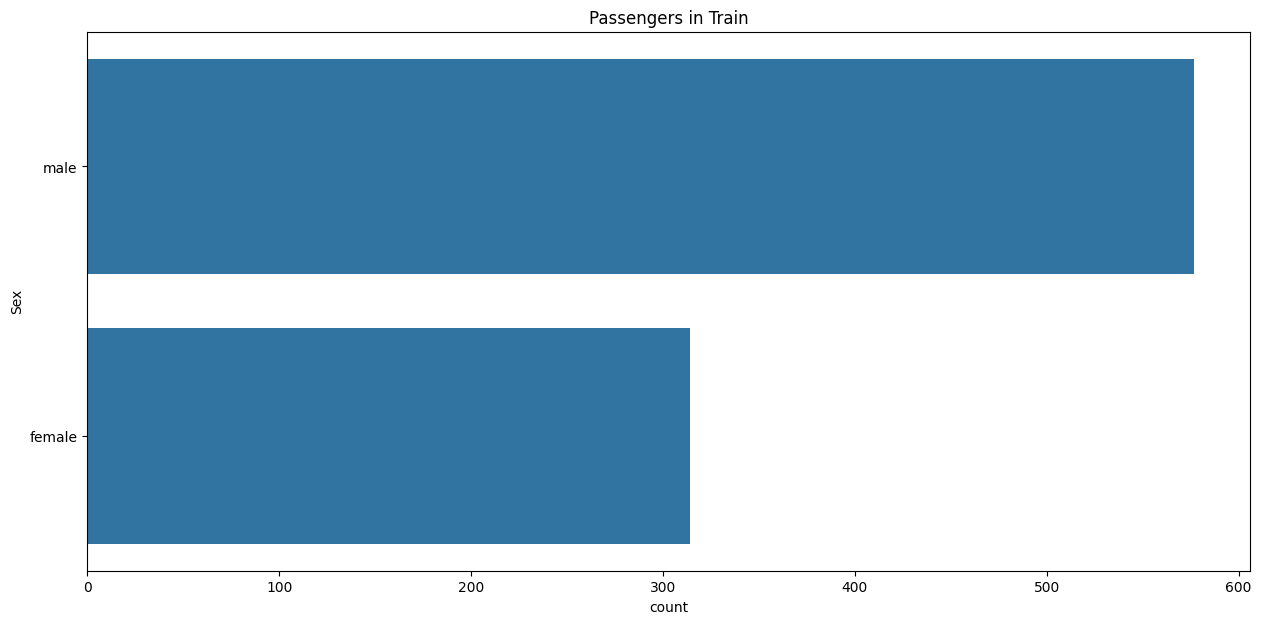

In [ ]:
men=train.loc[train['Sex']=='male']
m=len(men)
print('There were ',m,' Male passengers')
female=train.loc[train['Sex']=='female']
f=len(female)
print('There were ',f,' Female passengers')
plt.figure(figsize=(15,7))
sns.countplot(train['Sex'])
plt.title('Passengers in Train')
plt.show()

The above visualization helps in understanding the gender distribution among the passengers in the train dataset, which can be an important factor when analyzing survival rates or other aspects related to gender.

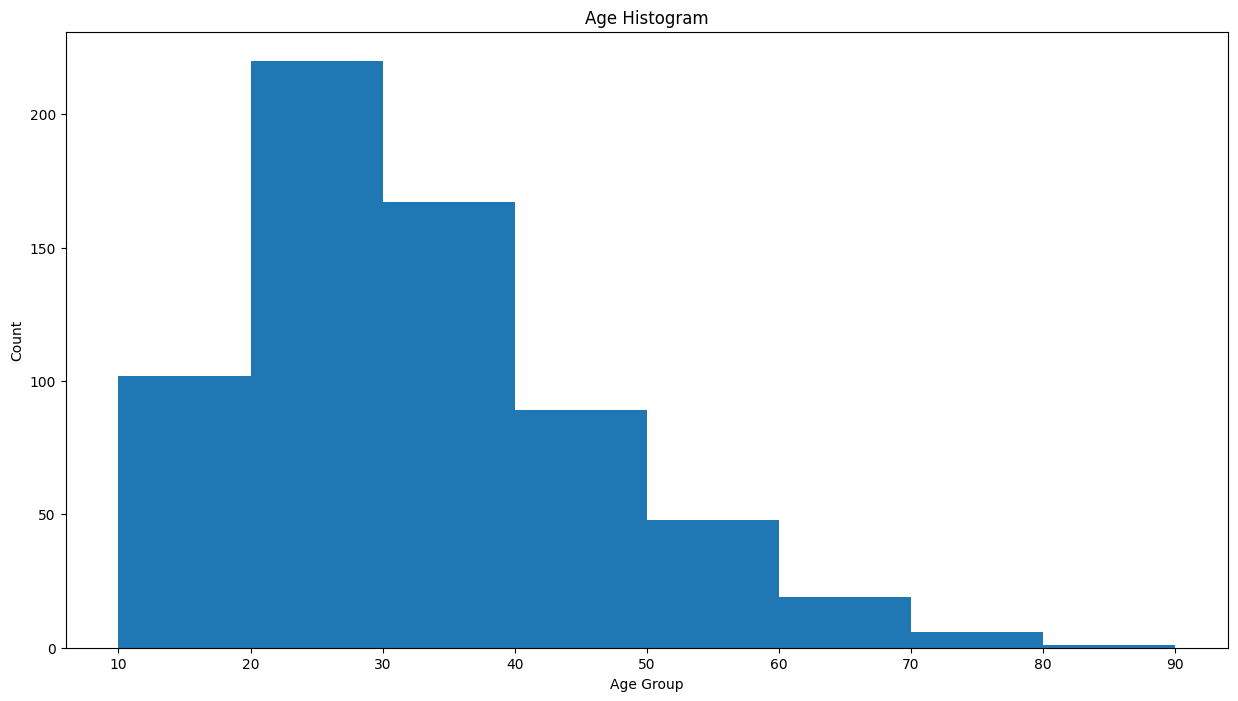

In [ ]:
plt.figure(figsize=(15,8))
bins=[10,20,30,40,50,60,70,80,90]
plt.hist(train['Age'],bins=bins)
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.title('Age Histogram')
plt.show()

Male Survived percentage :  18.890814558058924
Female Survived percentage :  40.38128249566724


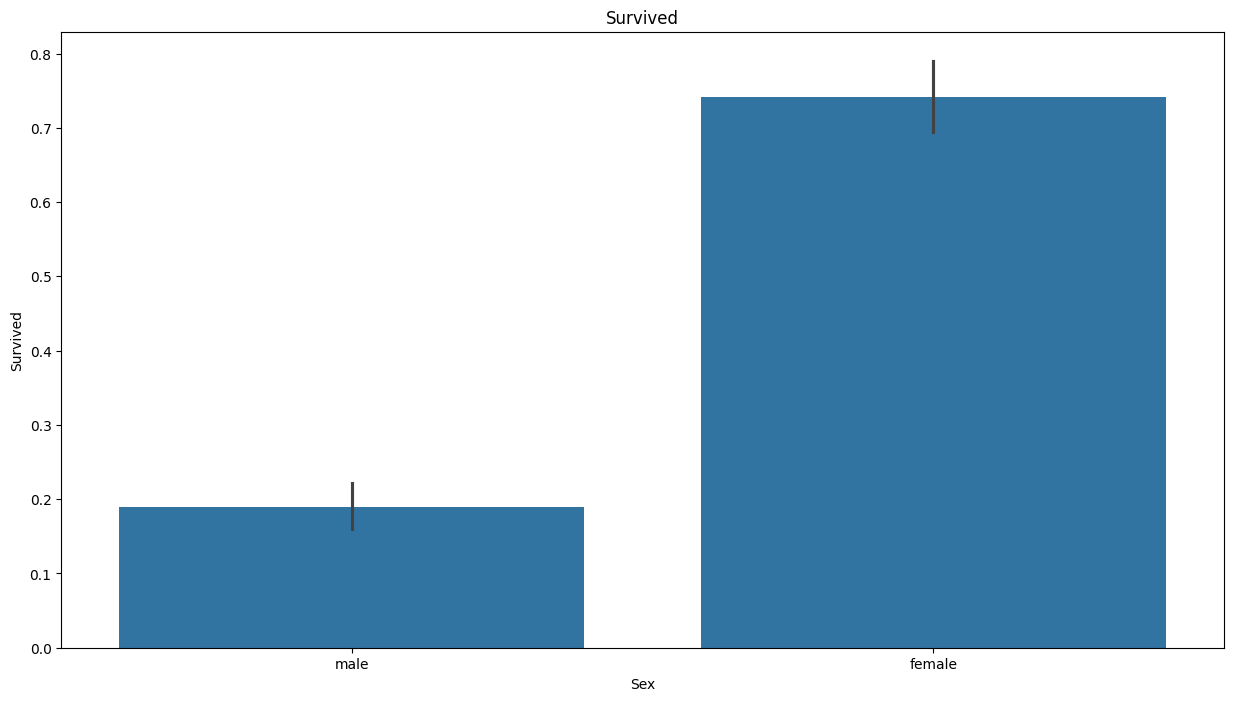

In [ ]:
survived_male=train['Survived'][train['Sex']=='male'].value_counts()
per_m=(survived_male[1]*100)/m
print('Male Survived percentage : ',per_m)
survived_female=train['Survived'][train['Sex']=='female'].value_counts()
per_f=(survived_female[1]*100)/m
print('Female Survived percentage : ',per_f)
plt.figure(figsize=(15,8))
sns.barplot(x=train['Sex'],y=train['Survived'])
plt.title('Survived')
plt.show()

In [ ]:
train["CabinBool"] = train["Cabin"].notnull().astype('int')
test["CabinBool"] = test["Cabin"].notnull().astype('int')

In [ ]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [ ]:
embarked=train.groupby(train['Embarked'])['Embarked'].count()
embarked

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [ ]:
train['Embarked']=train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinBool        0
dtype: int64

In [ ]:
embarked_mapping={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=test['Embarked'].map(embarked_mapping)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1


In [ ]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1,1


In [ ]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
age_grp=[-1,0,5,12,18,24,35,60,90]
label=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup']=pd.cut(train['Age'],age_grp,labels=label)
test['AgeGroup']=pd.cut(test['Age'],age_grp,labels=label)

In [ ]:
train['AgeGroup']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Unknown
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' <
                         'Senior']

In [ ]:
age_map={'Unknown':0,'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}
train['AgeGroup']=train['AgeGroup'].map(age_map)
test['AgeGroup']=test['AgeGroup'].map(age_map)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1,1,5


In [ ]:
sex_mapping={'male':0,'female':1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,1,1,5


In [ ]:
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,0,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,1,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,1,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,1,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,1,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,1,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,0,26.0,0,0,30.0000,2,1,1,5


In [ ]:
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass=test['Pclass'][x]
        test['Fare'][x]=train[train["Pclass"]==pclass]['Fare'].mean()

<ipython-input-16203-6bd8aa9e1a1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][x]=train[train["Pclass"]==pclass]['Fare'].mean()


In [ ]:
train['FareBand']=pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,0,22.0,1,0,7.2500,1,0,1,4,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,3,6,4
2,3,1,3,1,26.0,0,0,7.9250,1,0,2,5,2
3,4,1,1,1,35.0,1,0,53.1000,1,1,3,5,4
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,6,5,2
887,888,1,1,1,19.0,0,0,30.0000,1,1,2,4,3
888,889,0,3,1,-0.5,1,2,23.4500,1,0,2,0,3
889,890,1,1,0,26.0,0,0,30.0000,2,1,1,5,3


In [ ]:
train=train.drop(['Age','Fare'],axis=1)
teat=test.drop(['Age','Fare'],axis=1)
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,0,1,4,1
1,2,1,1,1,1,0,2,1,3,6,4
2,3,1,3,1,0,0,1,0,2,5,2
3,4,1,1,1,1,0,1,1,3,5,4
4,5,0,3,0,0,0,1,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,0,6,5,2
887,888,1,1,1,0,0,1,1,2,4,3
888,889,0,3,1,1,2,1,0,2,0,3
889,890,1,1,0,0,0,2,1,1,5,3


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
Title          0
AgeGroup       0
FareBand       0
dtype: int64

In [ ]:
test=test.drop(['Fare','Age'],axis=1)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
Title          0
AgeGroup       0
FareBand       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
predictors=train.drop(['PassengerId','Survived'],axis=1)
target=train['Survived']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.22,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print('Accuracy : ',acc_logreg)

Accuracy :  79.7


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print('Accuracy : ',acc_randomforest)

Accuracy :  85.28


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print('Accuracy : ',acc_svc)

Accuracy :  83.25


In [ ]:
model_df=pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','SVC'],
                      'Accuracy':[acc_logreg,acc_randomforest,acc_svc]})
model_df=model_df.sort_values('Accuracy',ascending=False,ignore_index=True)
model_df

,Model,Accuracy
0,Random Forest Classifier,85.28
1,SVC,83.25
2,Logistic Regression,79.70


In [ ]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('final_prediction.csv', index=False)

We have predicted the survival of passengers on the Titanic.
The "Survived" column in final_prediction.csv contains two values: 0 represents "Not survived" and 1 represents "Survived".

# Extra Points 5 points

creating a copy of the dataset

In [ ]:
wine_quality_data02=updated_dataset.copy()

displaying the unique values in the dataset

In [ ]:
wine_quality_data02['quality'].unique()

array([3, 4, 7, 8, 5, 6])

Quality 3, 4, 5: Mapped to 'bad'.

Quality 6, 7, 8: Mapped to 'good'.

In [ ]:
wine_quality_data02['quality'] = wine_quality_data02['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad', 6: 'good', 7: 'good', 8: 'good'})

In [ ]:
wine_quality_data02['quality'].value_counts()

quality
bad     1830
good    1830
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_quality_data02['quality'] = le.fit_transform(wine_quality_data02['quality'])
wine_quality_data02['quality']

1505    0
899     0
459     0
517     0
1505    0
       ..
605     1
606     1
607     1
608     1
609     1
Name: quality, Length: 3660, dtype: int64

In [ ]:
X=wine_quality_data02.drop('quality',axis=1)
Y=wine_quality_data02['quality']

### Logistic Regression Model

The code snippet splits the dataset into training and testing sets using a 75-25 ratio. It then standardizes the features of the training and testing sets using StandardScaler. After initializing a Logistic Regression model, it trains the model on the training data. Subsequently, the model predicts labels for the standardized testing data. Finally, it evaluates the model's performance by generating a classification report and calculating the accuracy score using classification_report and accuracy_score, respectively.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size = 0.25)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtr = sc.fit_transform(x_train)
xte= sc.fit_transform(x_test)
model = LogisticRegression()

model.fit(x_train, y_train)
ypredi = model.predict(xte)

print(classification_report(y_test, ypredi))

acc_lr=accuracy_score(y_test,ypredi)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       473
           1       0.81      0.80      0.81       442

    accuracy                           0.81       915
   macro avg       0.81      0.81      0.81       915
weighted avg       0.81      0.81      0.81       915



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Support Vector Classifier Model

The code snippet initializes a Support Vector Classifier (SVC) model and trains it on the training data. It then uses the trained model to predict labels for the testing data. After making predictions, it prints a classification report to evaluate the model's performance, and calculates the accuracy score using `accuracy_score`.

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
yp= model.predict(x_test)

print(classification_report(y_test, yp))
acc_svc=accuracy_score(y_test,yp)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       473
           1       0.88      0.71      0.79       442

    accuracy                           0.81       915
   macro avg       0.83      0.81      0.81       915
weighted avg       0.82      0.81      0.81       915



##K-nearest Neighbour

The code initializes a K-Nearest Neighbors Classifier (KNN) with `n_neighbors=3`, meaning it considers 3 nearest neighbors for classification. It then trains the model on the training data and predicts labels for the testing data. The classification report is printed to evaluate the model's performance, which includes metrics like precision, recall, and F1-score for each class. Additionally, the accuracy score is calculated using `accuracy_score` to quantify the model's overall accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
ypr = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(classification_report(y_test, ypr))

acc_knn=accuracy_score(y_test,ypr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       473
           1       0.87      0.86      0.87       442

    accuracy                           0.87       915
   macro avg       0.87      0.87      0.87       915
weighted avg       0.87      0.87      0.87       915



In [ ]:
modeldf=pd.DataFrame({'Model':['Logistic Regression','Support Vector Classifier','KNN'],
                      'Accuracy Score': [acc_lr, acc_svc, acc_knn]})
modeldf

,Model,Accuracy Score
0,Logistic Regression,0.814208
1,Support Vector Classifier,0.814208
2,KNN,0.872131


**Logistic Regression**: This model has an accuracy score of 0.794536, meaning it correctly predicts the wine quality about 79.45% of the time.

**Support Vector Classifier (SVC):** The SVC performs slightly better with an accuracy score of 0.831694, indicating it predicts wine quality accurately around 83.17% of the time.

**KNN (K-Nearest Neighbors):** KNN shows the highest accuracy among the three with a score of 0.869945, suggesting it's the most accurate in predicting wine quality, getting it right about 86.99% of the time.

**Conclusion**
Among the three models evaluated, KNN performs the best in terms of accuracy with a score of 0.869945. It's followed by the Support Vector Classifier with an accuracy of 0.831694, and Logistic Regression comes last with an accuracy of 0.794536. Therefore, for predicting wine quality based on this accuracy metric, KNN would be the recommended model due to its highest accuracy rate.

**Advantages of Classification for Wine Quality**

**Streamlined Output:** Classification categorizes wines into quality classes like "low," "medium," and "high," simplifying the output and making it more accessible for discussions.

**Handling Non-linearity:** Many classification algorithms effectively manage non-linear relationships, which is beneficial when intricate interactions among chemical characteristics determine quality grades.

**Performance Metrics:** Classification offers various metrics such as accuracy, precision, recall, and F1-score. These metrics provide diverse insights into model performance, especially beneficial for unbalanced datasets.

**Drawbacks of Classification for Wine Quality**

**Loss of Information:** Categorizing continuous data leads to information loss, reducing the granularity of the output, which might be essential for quality control applications.

**Arbitrary Thresholds**: The thresholds defining quality classes can be arbitrary, possibly not capturing meaningful quality variations accurately.

**Imbalance Sensitivity**: Classification models can struggle with imbalanced datasets where certain quality classes are underrepresented.

On the other hand, regression models provide a score indicating nuanced variations in wine quality. This makes them more valuable for applications like production optimization and quality control. In contrast, classification models simplify the quality assessment to categories, which might be more suitable for consumer-focused or marketing applications.

**Choosing Between Classification and Regression -**

**Regression Approach:** Ideal for precise and comprehensive wine quality predictions, enabling detailed control and optimization.

**Classification Approach:** Suited for simpler decisions, like selecting wines for specific product lines or market segments.

**Conclusion**
When deciding between regression and classification for wine quality analysis, the specific application's requirements should guide the choice. Regression analysis excels in forecasting future trends and understanding intricate quality details. In contrast, classification proves beneficial for tasks like consumer segmentation, targeted marketing, or adhering to category-specific quality standards.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/ML_Assignment03.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ML_Assignment03.ipynb to html
[NbConvertApp] Writing 2148260 bytes to /content/drive/MyDrive/Colab Notebooks/ML_Assignment03.html
